# Clustering Iris dataset using K-Means
<img src='images/clustering.png' width=800><br>
Illustration of k-means clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3)

Data description : [iris_dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset)

In [2]:
X, y = datasets.load_iris(as_frame=True, return_X_y=True)

In [3]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [5]:
X_train, X_test = train_test_split(X, test_size=0.25, random_state=42)

model = KMeans(n_clusters=3, random_state=42)
model.fit(X_train)

print(f'Labels - shape {model.labels_.shape}\n', model.labels_)
print(f'Cluster centers - shape {model.cluster_centers_.shape}\n', model.cluster_centers_)

Labels - shape (112,)
 [1 1 0 0 0 1 1 0 0 2 0 2 0 2 0 1 2 0 1 1 1 0 0 1 1 1 0 1 0 2 1 0 0 1 0 0 0
 0 2 0 1 0 2 1 1 0 2 1 0 1 1 0 0 2 0 2 2 0 1 1 0 2 1 1 1 0 2 1 2 2 1 0 0 0
 2 2 1 2 0 2 0 0 0 1 0 0 1 0 2 2 1 0 2 2 1 2 1 2 2 2 0 2 0 0 0 0 1 0 0 1 0
 2]
Cluster centers - shape (3, 4)
 [[5.819 2.719 4.371 1.433]
 [4.997 3.429 1.46  0.246]
 [6.855 3.103 5.707 2.021]]


# Verify prediction algorithm

In [6]:
X_example = np.array(X_train)[:10]

# manually predict tenth example
distances = []
for i in range(3):
    # calc distance from each centroid
    d = np.linalg.norm(X_example[9] - model.cluster_centers_[i])
    distances.append(d)
calculated_cluster = np.argmin(distances)
print(calculated_cluster, model.labels_[9])

2 2


# Plot clusters

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

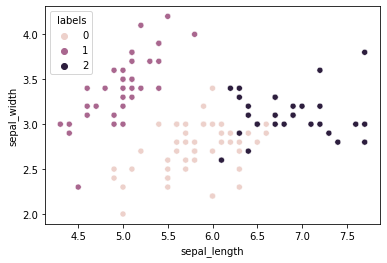

In [7]:
data = pd.DataFrame({
    'sepal_length': X_train['sepal length (cm)'],
    'sepal_width': X_train['sepal width (cm)'],
    'labels': model.labels_
})

sns.scatterplot(x='sepal_length', y='sepal_width', hue='labels', data=data)